In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from collections import OrderedDict


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, log_loss

import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
#import lightgbm as lgb
import xgboost as xgb

#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.utils import to_categorical
#from keras.callbacks import History
#from keras.models import Sequential
#from keras.layers import Dense, Input

#import keras.backend as K

#from keras.models import Sequential
#from keras.layers import Dense, Dropout
#from keras.regularizers import l2
#from keras.callbacks import History
#from keras import backend as K
#from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")


pd.set_option('display.max_columns', None)



In [2]:
# Reading Files and Creating Data Frame
#aisle = pd.read_csv('/Users/19459/Documents/insta data/aisles.csv')
#departments = pd.read_csv('/Users/19459/Documents/insta data/departments.csv')
#products = pd.read_csv('/Users/19459/Documents/insta data/products.csv')
#orders = pd.read_csv('/Users/19459/Documents/insta data/orders.csv')
#order_products_prior = pd.read_csv('/Users/19459/Documents/insta data/order_products__prior_subset.csv')
#order_products_train = pd.read_csv('/Users/19459/Documents/insta data/order_products__train_subset.csv')

In [94]:
# aisle = pd.read_csv('/Users/abhinavsharma/Documents/Jyoti MSBA/Data/Full/aisles.csv')
# departments = pd.read_csv('/Users/abhinavsharma/Documents/Jyoti MSBA/Data/Full/departments.CSV')
products = pd.read_csv('/Users/abhinavsharma/Documents/Jyoti MSBA/Data/Full/products.CSV')
# orders = pd.read_csv('/Users/abhinavsharma/Documents/Jyoti MSBA/Data/Full/orders.CSV')
# order_products_prior = pd.read_csv('/Users/abhinavsharma/Documents/Jyoti MSBA/Data/Full/order_products__prior.CSV')
# order_products_train = pd.read_csv('/Users/abhinavsharma/Documents/Jyoti MSBA/Data/Full/order_products__train.CSV')

In [4]:
df = pd.read_pickle('/Users/abhinavsharma/Documents/Jyoti MSBA/Data/Full/Finaldata.pkl')
df.head()

,user_id,product_id,total_product_orders_by_user,total_product_reorders_by_user,user_product_reorder_percentage,avg_add_to_cart_by_user,avg_days_since_last_bought,last_ordered_in,is_reorder_3,is_reorder_2,is_reorder_1,order_number,order_dow,order_hour_of_day,days_since_prior_order,reordered,mean_add_to_cart_order,total_orders,total_reorders,reorder_percentage,unique_users,order_first_time_total_cnt,order_second_time_total_cnt,is_organic,second_time_percent,aisle_mean_add_to_cart_order,aisle_std_add_to_cart_order,aisle_total_orders,aisle_total_reorders,aisle_reorder_percentage,aisle_unique_users,aisle_0,aisle_1,aisle_2,aisle_3,aisle_4,aisle_5,aisle_6,aisle_7,department_mean_add_to_cart_order,department_std_add_to_cart_order,department_total_orders,department_total_reorders,department_reorder_percentage,department_unique_users,department_0,department_1,department_2,department_3,department_4,avg_dow,std_dow,avg_doh,std_doh,avg_since_order,std_since_order,total_orders_by_user,total_products_by_user,total_unique_product_by_user,total_reorders_by_user,reorder_propotion_by_user,average_order_size,reorder_in_order,orders_3,orders_2,orders_1,reorder_3,reorder_2,reorder_1
0,1,196,10.0,9.0,0.900000,1.400000,17.600000,10.0,1.0,1.0,1.0,11.0,4.0,8.0,14.0,1.0,3.721774,35791,27791,0.776480,8000,8000,4660,0,0.582500,6.453676,6.450721,357537,228406,0.638832,63506,0,0,1,1,0,1,1,1,6.976699,6.711172,2690129,1757892,0.653460,172795,0,0,0,1,1,2.644068,1.256194,10.542373,3.500355,18.542373,10.559065,10,59,18,41,0.694915,5.9,0.705833,6.0,6.0,9.0,0.666667,1.0,0.666667
1,1,10258,9.0,8.0,0.888889,3.333333,19.555556,10.0,1.0,1.0,1.0,11.0,4.0,8.0,14.0,1.0,4.277492,1946,1389,0.713772,557,557,308,0,0.552962,9.319779,7.905307,306487,159119,0.519170,76177,0,1,1,0,0,1,1,0,9.187743,7.692492,2887550,1657973,0.574180,174219,0,0,0,0,1,2.644068,1.256194,10.542373,3.500355,18.542373,10.559065,10,59,18,41,0.694915,5.9,0.705833,6.0,6.0,9.0,0.666667,1.0,0.666667
2,1,10326,1.0,0.0,0.000000,5.000000,28.000000,5.0,0.0,0.0,0.0,11.0,4.0,8.0,14.0,0.0,4.191097,5526,3603,0.652009,1923,1923,1003,0,0.521581,7.144228,6.280129,3642188,2615469,0.718104,177141,0,1,0,1,0,0,1,0,8.022875,6.658899,9479291,6160710,0.649913,193237,0,1,1,1,0,2.644068,1.256194,10.542373,3.500355,18.542373,10.559065,10,59,18,41,0.694915,5.9,0.705833,6.0,6.0,9.0,0.666667,1.0,0.666667
3,1,12427,10.0,9.0,0.900000,3.300000,17.600000,10.0,1.0,1.0,1.0,11.0,4.0,8.0,14.0,0.0,4.760037,6476,4797,0.740735,1679,1679,889,0,0.529482,8.464525,7.373249,163524,96804,0.591986,44854,0,0,1,0,1,1,0,0,9.187743,7.692492,2887550,1657973,0.574180,174219,0,0,0,0,1,2.644068,1.256194,10.542373,3.500355,18.542373,10.559065,10,59,18,41,0.694915,5.9,0.705833,6.0,6.0,9.0,0.666667,1.0,0.666667
4,1,13032,3.0,2.0,0.666667,6.333333,21.666667,10.0,1.0,0.0,0.0,11.0,4.0,8.0,14.0,1.0,5.622767,3751,2465,0.657158,1286,1286,617,0,0.479782,9.045796,7.564587,377586,215822,0.571584,77080,0,0,0,1,1,0,1,0,9.124044,7.602460,709569,398013,0.560922,114169,0,1,1,0,0,2.644068,1.256194,10.542373,3.500355,18.542373,10.559065,10,59,18,41,0.694915,5.9,0.705833,6.0,6.0,9.0,0.666667,1.0,0.666667


In [5]:
def reduce_memory(df):
    
    """
    This function reduce the dataframe memory usage by converting it's type for easier handling.
    
    Parameters: Dataframe
    Return: Dataframe
    """
    
    start_mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    
    for col in df.columns:
        if df[col].dtypes in ["int64", "int32", "int16"]:
            
            cmin = df[col].min()
            cmax = df[col].max()
            
            if cmin > np.iinfo(np.int8).min and cmax < np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            
            elif cmin > np.iinfo(np.int16).min and cmax < np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)
            
            elif cmin > np.iinfo(np.int32).min and cmax < np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
        
        if df[col].dtypes in ["float64", "float32"]:
            
            cmin = df[col].min()
            cmax = df[col].max()
            
            if cmin > np.finfo(np.float16).min and cmax < np.finfo(np.float16).max:
                df[col] = df[col].astype(np.float16)
            
            elif cmin > np.finfo(np.float32).min and cmax < np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
    
    print("")
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    
    return df

In [6]:
df['order_diff'] = df.order_number - df.last_ordered_in


In [9]:
df_full = df.copy()

In [10]:
#df.drop(['user_id', 'product_id'], axis = 1, inplace = True)

In [11]:
df.head()

,user_id,product_id,total_product_orders_by_user,total_product_reorders_by_user,user_product_reorder_percentage,avg_add_to_cart_by_user,avg_days_since_last_bought,last_ordered_in,is_reorder_3,is_reorder_2,is_reorder_1,order_number,order_dow,order_hour_of_day,days_since_prior_order,reordered,mean_add_to_cart_order,total_orders,total_reorders,reorder_percentage,unique_users,order_first_time_total_cnt,order_second_time_total_cnt,is_organic,second_time_percent,aisle_mean_add_to_cart_order,aisle_std_add_to_cart_order,aisle_total_orders,aisle_total_reorders,aisle_reorder_percentage,aisle_unique_users,aisle_0,aisle_1,aisle_2,aisle_3,aisle_4,aisle_5,aisle_6,aisle_7,department_mean_add_to_cart_order,department_std_add_to_cart_order,department_total_orders,department_total_reorders,department_reorder_percentage,department_unique_users,department_0,department_1,department_2,department_3,department_4,avg_dow,std_dow,avg_doh,std_doh,avg_since_order,std_since_order,total_orders_by_user,total_products_by_user,total_unique_product_by_user,total_reorders_by_user,reorder_propotion_by_user,average_order_size,reorder_in_order,orders_3,orders_2,orders_1,reorder_3,reorder_2,reorder_1,order_diff
0,1,196,10.0,9.0,0.900000,1.400000,17.600000,10.0,1.0,1.0,1.0,11.0,4.0,8.0,14.0,1.0,3.721774,35791,27791,0.776480,8000,8000,4660,0,0.582500,6.453676,6.450721,357537,228406,0.638832,63506,0,0,1,1,0,1,1,1,6.976699,6.711172,2690129,1757892,0.653460,172795,0,0,0,1,1,2.644068,1.256194,10.542373,3.500355,18.542373,10.559065,10,59,18,41,0.694915,5.9,0.705833,6.0,6.0,9.0,0.666667,1.0,0.666667,1.0
1,1,10258,9.0,8.0,0.888889,3.333333,19.555556,10.0,1.0,1.0,1.0,11.0,4.0,8.0,14.0,1.0,4.277492,1946,1389,0.713772,557,557,308,0,0.552962,9.319779,7.905307,306487,159119,0.519170,76177,0,1,1,0,0,1,1,0,9.187743,7.692492,2887550,1657973,0.574180,174219,0,0,0,0,1,2.644068,1.256194,10.542373,3.500355,18.542373,10.559065,10,59,18,41,0.694915,5.9,0.705833,6.0,6.0,9.0,0.666667,1.0,0.666667,1.0
2,1,10326,1.0,0.0,0.000000,5.000000,28.000000,5.0,0.0,0.0,0.0,11.0,4.0,8.0,14.0,0.0,4.191097,5526,3603,0.652009,1923,1923,1003,0,0.521581,7.144228,6.280129,3642188,2615469,0.718104,177141,0,1,0,1,0,0,1,0,8.022875,6.658899,9479291,6160710,0.649913,193237,0,1,1,1,0,2.644068,1.256194,10.542373,3.500355,18.542373,10.559065,10,59,18,41,0.694915,5.9,0.705833,6.0,6.0,9.0,0.666667,1.0,0.666667,6.0
3,1,12427,10.0,9.0,0.900000,3.300000,17.600000,10.0,1.0,1.0,1.0,11.0,4.0,8.0,14.0,0.0,4.760037,6476,4797,0.740735,1679,1679,889,0,0.529482,8.464525,7.373249,163524,96804,0.591986,44854,0,0,1,0,1,1,0,0,9.187743,7.692492,2887550,1657973,0.574180,174219,0,0,0,0,1,2.644068,1.256194,10.542373,3.500355,18.542373,10.559065,10,59,18,41,0.694915,5.9,0.705833,6.0,6.0,9.0,0.666667,1.0,0.666667,1.0
4,1,13032,3.0,2.0,0.666667,6.333333,21.666667,10.0,1.0,0.0,0.0,11.0,4.0,8.0,14.0,1.0,5.622767,3751,2465,0.657158,1286,1286,617,0,0.479782,9.045796,7.564587,377586,215822,0.571584,77080,0,0,0,1,1,0,1,0,9.124044,7.602460,709569,398013,0.560922,114169,0,1,1,0,0,2.644068,1.256194,10.542373,3.500355,18.542373,10.559065,10,59,18,41,0.694915,5.9,0.705833,6.0,6.0,9.0,0.666667,1.0,0.666667,1.0


In [12]:
#df = df.sample(frac=0.1)

In [13]:
label = 'reordered'
x_cols = df.columns.drop('reordered')

In [14]:
X = df[x_cols]
y = df[label]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6779728, 69) (6779728,)
(1694933, 69) (1694933,)


In [16]:
X_train_full = X_train.copy()


In [17]:
X_train_full

,user_id,product_id,total_product_orders_by_user,total_product_reorders_by_user,user_product_reorder_percentage,avg_add_to_cart_by_user,avg_days_since_last_bought,last_ordered_in,is_reorder_3,is_reorder_2,is_reorder_1,order_number,order_dow,order_hour_of_day,days_since_prior_order,mean_add_to_cart_order,total_orders,total_reorders,reorder_percentage,unique_users,order_first_time_total_cnt,order_second_time_total_cnt,is_organic,second_time_percent,aisle_mean_add_to_cart_order,aisle_std_add_to_cart_order,aisle_total_orders,aisle_total_reorders,aisle_reorder_percentage,aisle_unique_users,aisle_0,aisle_1,aisle_2,aisle_3,aisle_4,aisle_5,aisle_6,aisle_7,department_mean_add_to_cart_order,department_std_add_to_cart_order,department_total_orders,department_total_reorders,department_reorder_percentage,department_unique_users,department_0,department_1,department_2,department_3,department_4,avg_dow,std_dow,avg_doh,std_doh,avg_since_order,std_since_order,total_orders_by_user,total_products_by_user,total_unique_product_by_user,total_reorders_by_user,reorder_propotion_by_user,average_order_size,reorder_in_order,orders_3,orders_2,orders_1,reorder_3,reorder_2,reorder_1,order_diff
4071794,98586,36313,2.0,1.0,0.5,5.5,30.0,4.0,0.0,0.0,0.0,9.0,3.0,9.0,5.0,10.892285,687,418,0.608443,269,269,97,0,0.360595,10.762161,8.131685,382456,225748,0.590259,25819,0,0,1,1,0,0,1,0,10.575925,8.141542,423802,245369,0.578971,33730,0,1,0,0,0,2.666667,2.362908,10.385965,1.800341,17.964912,10.692061,8,57,37,20,0.350877,7.125000,0.453125,4.0,10.0,4.0,0.750000,0.500000,0.500000,5.0
3299026,80058,35855,2.0,1.0,0.5,7.5,6.0,17.0,1.0,0.0,0.0,20.0,5.0,16.0,5.0,8.603631,5177,1865,0.360247,3312,3312,979,0,0.295592,9.039906,7.777958,326692,99668,0.305082,86080,0,1,0,1,1,0,1,0,9.593425,7.875241,1875577,650301,0.346721,172755,0,0,0,1,0,2.064356,2.396269,16.316832,3.117694,12.767327,10.168252,19,202,118,84,0.415842,10.631579,0.408976,19.0,12.0,16.0,0.315789,0.916667,0.500000,3.0
2664102,65012,9290,2.0,1.0,0.5,8.5,15.5,8.0,0.0,0.0,0.0,14.0,6.0,12.0,29.0,8.698146,2912,1893,0.650069,1019,1019,481,0,0.472031,9.207741,7.435740,390299,217262,0.556655,58749,0,0,0,0,0,1,0,0,8.996414,7.393502,2236432,1211890,0.541885,163233,0,0,1,0,0,2.936709,2.131605,15.531646,3.008842,17.626582,9.069080,13,158,68,90,0.569620,12.153846,0.640951,6.0,2.0,1.0,1.000000,1.000000,1.000000,6.0
4660072,112835,15097,1.0,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,14.0,3.0,12.0,25.0,10.034968,2202,769,0.349228,1433,1433,352,0,0.245639,9.899797,8.051489,222049,68520,0.308581,80108,0,1,1,0,0,1,1,1,9.593425,7.875241,1875577,650301,0.346721,172755,0,0,0,1,0,2.404762,2.263814,12.309524,2.300457,11.880952,8.317488,13,42,31,11,0.261905,3.230769,0.482143,4.0,1.0,1.0,1.000000,1.000000,1.000000,13.0
6414502,156039,39699,1.0,0.0,0.0,16.0,5.0,4.0,0.0,0.0,0.0,6.0,2.0,9.0,30.0,10.849567,2772,1441,0.519841,1331,1331,456,0,0.342600,10.161450,7.745705,200687,98243,0.489533,53892,0,1,0,0,1,1,0,1,10.212863,7.732583,866627,399581,0.461076,124820,0,1,0,1,0,4.070796,1.811259,10.743363,6.472164,8.504425,9.177928,5,113,92,21,0.185841,22.600000,0.181033,16.0,32.0,20.0,0.062500,0.218750,0.450000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764704,18618,33754,2.0,1.0,0.5,6.0,22.5,4.0,0.0,1.0,0.0,5.0,3.0,13.0,9.0,7.456294,29893,22419,0.749975,7474,7474,4189,0,0.560476,7.861644,6.663141,1452343,997018,0.686489,124393,0,0,0,0,1,0,0,1,7.495423,6.611611,5414016,3627221,0.669969,190565,0,0,1,1,0,2.927273,2.316243,13.163636,3.230432,13.800000,11.598851,4,55,33,22,0.400000,13.750000,0.423016,15.0,9.0,14.0,0.533333,0.444444,0.714286,1.0
2360846,57522,31562,1.0,0.0,0.0,9.0,18.0,6.0,0.0,0.0,0.0,27.0,0.0,18.0,6.0,8.978645,7024,3495,0.497580,3529,3529,1377,0,0.390196,8.852012,6.855405,3418021,2032172,0.594546,159213,0,0,1,0,0,1,0,0

In [18]:
X_test_full = X_test.copy()

In [19]:
X_train.drop(['user_id', 'product_id'], axis = 1, inplace = True)

In [20]:
X_train

,total_product_orders_by_user,total_product_reorders_by_user,user_product_reorder_percentage,avg_add_to_cart_by_user,avg_days_since_last_bought,last_ordered_in,is_reorder_3,is_reorder_2,is_reorder_1,order_number,order_dow,order_hour_of_day,days_since_prior_order,mean_add_to_cart_order,total_orders,total_reorders,reorder_percentage,unique_users,order_first_time_total_cnt,order_second_time_total_cnt,is_organic,second_time_percent,aisle_mean_add_to_cart_order,aisle_std_add_to_cart_order,aisle_total_orders,aisle_total_reorders,aisle_reorder_percentage,aisle_unique_users,aisle_0,aisle_1,aisle_2,aisle_3,aisle_4,aisle_5,aisle_6,aisle_7,department_mean_add_to_cart_order,department_std_add_to_cart_order,department_total_orders,department_total_reorders,department_reorder_percentage,department_unique_users,department_0,department_1,department_2,department_3,department_4,avg_dow,std_dow,avg_doh,std_doh,avg_since_order,std_since_order,total_orders_by_user,total_products_by_user,total_unique_product_by_user,total_reorders_by_user,reorder_propotion_by_user,average_order_size,reorder_in_order,orders_3,orders_2,orders_1,reorder_3,reorder_2,reorder_1,order_diff
4071794,2.0,1.0,0.5,5.5,30.0,4.0,0.0,0.0,0.0,9.0,3.0,9.0,5.0,10.892285,687,418,0.608443,269,269,97,0,0.360595,10.762161,8.131685,382456,225748,0.590259,25819,0,0,1,1,0,0,1,0,10.575925,8.141542,423802,245369,0.578971,33730,0,1,0,0,0,2.666667,2.362908,10.385965,1.800341,17.964912,10.692061,8,57,37,20,0.350877,7.125000,0.453125,4.0,10.0,4.0,0.750000,0.500000,0.500000,5.0
3299026,2.0,1.0,0.5,7.5,6.0,17.0,1.0,0.0,0.0,20.0,5.0,16.0,5.0,8.603631,5177,1865,0.360247,3312,3312,979,0,0.295592,9.039906,7.777958,326692,99668,0.305082,86080,0,1,0,1,1,0,1,0,9.593425,7.875241,1875577,650301,0.346721,172755,0,0,0,1,0,2.064356,2.396269,16.316832,3.117694,12.767327,10.168252,19,202,118,84,0.415842,10.631579,0.408976,19.0,12.0,16.0,0.315789,0.916667,0.500000,3.0
2664102,2.0,1.0,0.5,8.5,15.5,8.0,0.0,0.0,0.0,14.0,6.0,12.0,29.0,8.698146,2912,1893,0.650069,1019,1019,481,0,0.472031,9.207741,7.435740,390299,217262,0.556655,58749,0,0,0,0,0,1,0,0,8.996414,7.393502,2236432,1211890,0.541885,163233,0,0,1,0,0,2.936709,2.131605,15.531646,3.008842,17.626582,9.069080,13,158,68,90,0.569620,12.153846,0.640951,6.0,2.0,1.0,1.000000,1.000000,1.000000,6.0
4660072,1.0,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,14.0,3.0,12.0,25.0,10.034968,2202,769,0.349228,1433,1433,352,0,0.245639,9.899797,8.051489,222049,68520,0.308581,80108,0,1,1,0,0,1,1,1,9.593425,7.875241,1875577,650301,0.346721,172755,0,0,0,1,0,2.404762,2.263814,12.309524,2.300457,11.880952,8.317488,13,42,31,11,0.261905,3.230769,0.482143,4.0,1.0,1.0,1.000000,1.000000,1.000000,13.0
6414502,1.0,0.0,0.0,16.0,5.0,4.0,0.0,0.0,0.0,6.0,2.0,9.0,30.0,10.849567,2772,1441,0.519841,1331,1331,456,0,0.342600,10.161450,7.745705,200687,98243,0.489533,53892,0,1,0,0,1,1,0,1,10.212863,7.732583,866627,399581,0.461076,124820,0,1,0,1,0,4.070796,1.811259,10.743363,6.472164,8.504425,9.177928,5,113,92,21,0.185841,22.600000,0.181033,16.0,32.0,20.0,0.062500,0.218750,0.450000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764704,2.0,1.0,0.5,6.0,22.5,4.0,0.0,1.0,0.0,5.0,3.0,13.0,9.0,7.456294,29893,22419,0.749975,7474,7474,4189,0,0.560476,7.861644,6.663141,1452343,997018,0.686489,124393,0,0,0,0,1,0,0,1,7.495423,6.611611,5414016,3627221,0.669969,190565,0,0,1,1,0,2.927273,2.316243,13.163636,3.230432,13.800000,11.598851,4,55,33,22,0.400000,13.750000,0.423016,15.0,9.0,14.0,0.533333,0.444444,0.714286,1.0
2360846,1.0,0.0,0.0,9.0,18.0,6.0,0.0,0.0,0.0,27.0,0.0,18.0,6.0,8.978645,7024,3495,0.497580,3529,3529,1377,0,0.390196,8.852012,6.855405,3418021,2032172,0.594546,159213,0,0,1,0,0,1,0,0,8.022875,6.658899,9479291,6160710,0.649913,193237,0,1,1,1,0,1.352645,1.455250,11.277078,3.226908,10.591940,6.97

In [21]:
X_train_full

,user_id,product_id,total_product_orders_by_user,total_product_reorders_by_user,user_product_reorder_percentage,avg_add_to_cart_by_user,avg_days_since_last_bought,last_ordered_in,is_reorder_3,is_reorder_2,is_reorder_1,order_number,order_dow,order_hour_of_day,days_since_prior_order,mean_add_to_cart_order,total_orders,total_reorders,reorder_percentage,unique_users,order_first_time_total_cnt,order_second_time_total_cnt,is_organic,second_time_percent,aisle_mean_add_to_cart_order,aisle_std_add_to_cart_order,aisle_total_orders,aisle_total_reorders,aisle_reorder_percentage,aisle_unique_users,aisle_0,aisle_1,aisle_2,aisle_3,aisle_4,aisle_5,aisle_6,aisle_7,department_mean_add_to_cart_order,department_std_add_to_cart_order,department_total_orders,department_total_reorders,department_reorder_percentage,department_unique_users,department_0,department_1,department_2,department_3,department_4,avg_dow,std_dow,avg_doh,std_doh,avg_since_order,std_since_order,total_orders_by_user,total_products_by_user,total_unique_product_by_user,total_reorders_by_user,reorder_propotion_by_user,average_order_size,reorder_in_order,orders_3,orders_2,orders_1,reorder_3,reorder_2,reorder_1,order_diff
4071794,98586,36313,2.0,1.0,0.5,5.5,30.0,4.0,0.0,0.0,0.0,9.0,3.0,9.0,5.0,10.892285,687,418,0.608443,269,269,97,0,0.360595,10.762161,8.131685,382456,225748,0.590259,25819,0,0,1,1,0,0,1,0,10.575925,8.141542,423802,245369,0.578971,33730,0,1,0,0,0,2.666667,2.362908,10.385965,1.800341,17.964912,10.692061,8,57,37,20,0.350877,7.125000,0.453125,4.0,10.0,4.0,0.750000,0.500000,0.500000,5.0
3299026,80058,35855,2.0,1.0,0.5,7.5,6.0,17.0,1.0,0.0,0.0,20.0,5.0,16.0,5.0,8.603631,5177,1865,0.360247,3312,3312,979,0,0.295592,9.039906,7.777958,326692,99668,0.305082,86080,0,1,0,1,1,0,1,0,9.593425,7.875241,1875577,650301,0.346721,172755,0,0,0,1,0,2.064356,2.396269,16.316832,3.117694,12.767327,10.168252,19,202,118,84,0.415842,10.631579,0.408976,19.0,12.0,16.0,0.315789,0.916667,0.500000,3.0
2664102,65012,9290,2.0,1.0,0.5,8.5,15.5,8.0,0.0,0.0,0.0,14.0,6.0,12.0,29.0,8.698146,2912,1893,0.650069,1019,1019,481,0,0.472031,9.207741,7.435740,390299,217262,0.556655,58749,0,0,0,0,0,1,0,0,8.996414,7.393502,2236432,1211890,0.541885,163233,0,0,1,0,0,2.936709,2.131605,15.531646,3.008842,17.626582,9.069080,13,158,68,90,0.569620,12.153846,0.640951,6.0,2.0,1.0,1.000000,1.000000,1.000000,6.0
4660072,112835,15097,1.0,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,14.0,3.0,12.0,25.0,10.034968,2202,769,0.349228,1433,1433,352,0,0.245639,9.899797,8.051489,222049,68520,0.308581,80108,0,1,1,0,0,1,1,1,9.593425,7.875241,1875577,650301,0.346721,172755,0,0,0,1,0,2.404762,2.263814,12.309524,2.300457,11.880952,8.317488,13,42,31,11,0.261905,3.230769,0.482143,4.0,1.0,1.0,1.000000,1.000000,1.000000,13.0
6414502,156039,39699,1.0,0.0,0.0,16.0,5.0,4.0,0.0,0.0,0.0,6.0,2.0,9.0,30.0,10.849567,2772,1441,0.519841,1331,1331,456,0,0.342600,10.161450,7.745705,200687,98243,0.489533,53892,0,1,0,0,1,1,0,1,10.212863,7.732583,866627,399581,0.461076,124820,0,1,0,1,0,4.070796,1.811259,10.743363,6.472164,8.504425,9.177928,5,113,92,21,0.185841,22.600000,0.181033,16.0,32.0,20.0,0.062500,0.218750,0.450000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764704,18618,33754,2.0,1.0,0.5,6.0,22.5,4.0,0.0,1.0,0.0,5.0,3.0,13.0,9.0,7.456294,29893,22419,0.749975,7474,7474,4189,0,0.560476,7.861644,6.663141,1452343,997018,0.686489,124393,0,0,0,0,1,0,0,1,7.495423,6.611611,5414016,3627221,0.669969,190565,0,0,1,1,0,2.927273,2.316243,13.163636,3.230432,13.800000,11.598851,4,55,33,22,0.400000,13.750000,0.423016,15.0,9.0,14.0,0.533333,0.444444,0.714286,1.0
2360846,57522,31562,1.0,0.0,0.0,9.0,18.0,6.0,0.0,0.0,0.0,27.0,0.0,18.0,6.0,8.978645,7024,3495,0.497580,3529,3529,1377,0,0.390196,8.852012,6.855405,3418021,2032172,0.594546,159213,0,0,1,0,0,1,0,0

In [22]:
X_test.drop(['user_id', 'product_id'], axis = 1, inplace = True)

In [23]:
X_test

,total_product_orders_by_user,total_product_reorders_by_user,user_product_reorder_percentage,avg_add_to_cart_by_user,avg_days_since_last_bought,last_ordered_in,is_reorder_3,is_reorder_2,is_reorder_1,order_number,order_dow,order_hour_of_day,days_since_prior_order,mean_add_to_cart_order,total_orders,total_reorders,reorder_percentage,unique_users,order_first_time_total_cnt,order_second_time_total_cnt,is_organic,second_time_percent,aisle_mean_add_to_cart_order,aisle_std_add_to_cart_order,aisle_total_orders,aisle_total_reorders,aisle_reorder_percentage,aisle_unique_users,aisle_0,aisle_1,aisle_2,aisle_3,aisle_4,aisle_5,aisle_6,aisle_7,department_mean_add_to_cart_order,department_std_add_to_cart_order,department_total_orders,department_total_reorders,department_reorder_percentage,department_unique_users,department_0,department_1,department_2,department_3,department_4,avg_dow,std_dow,avg_doh,std_doh,avg_since_order,std_since_order,total_orders_by_user,total_products_by_user,total_unique_product_by_user,total_reorders_by_user,reorder_propotion_by_user,average_order_size,reorder_in_order,orders_3,orders_2,orders_1,reorder_3,reorder_2,reorder_1,order_diff
4910720,2.0,1.0,0.500,2.500,1.500,13.0,0.0,0.0,0.0,67.0,3.0,6.0,3.0,11.645592,2847,1264,0.443976,1583,1583,550,0,0.347442,10.762161,8.131685,382456,225748,0.590259,25819,0,0,1,1,0,0,1,0,10.575925,8.141542,423802,245369,0.578971,33730,0,1,0,0,0,2.269283,2.049328,9.791610,3.666280,5.290934,2.982889,66,739,296,443,0.599459,11.196970,0.605773,14.0,12.0,10.0,0.785714,0.583333,1.000000,54.0
2617827,2.0,1.0,0.500,8.500,5.000,55.0,0.0,0.0,0.0,61.0,3.0,17.0,9.0,10.188675,8035,5180,0.644680,2855,2855,1409,0,0.493520,10.762161,8.131685,382456,225748,0.590259,25819,0,0,1,1,0,0,1,0,10.575925,8.141542,423802,245369,0.578971,33730,0,1,0,0,0,2.271384,2.103598,12.956454,4.219979,6.855365,3.900823,60,1286,271,1015,0.789269,21.433333,0.798403,22.0,32.0,21.0,0.772727,0.968750,1.000000,6.0
6873479,1.0,0.0,0.000,12.000,30.000,7.0,0.0,0.0,0.0,13.0,0.0,3.0,12.0,8.884185,31792,20640,0.649220,11152,11152,5532,0,0.496055,8.852012,6.855405,3418021,2032172,0.594546,159213,0,0,1,0,0,1,0,0,8.022875,6.658899,9479291,6160710,0.649913,193237,0,1,1,1,0,4.343220,2.059952,15.432203,1.886024,22.716102,9.445021,12,236,123,113,0.478814,19.666667,0.529179,35.0,13.0,29.0,0.571429,0.615385,0.517241,6.0
3958405,8.0,7.0,0.875,4.500,19.500,14.0,1.0,1.0,0.0,15.0,5.0,6.0,11.0,6.775011,213584,170131,0.796553,43453,43453,29031,0,0.668101,7.144228,6.280129,3642188,2615469,0.718104,177141,0,1,0,1,0,0,1,0,8.022875,6.658899,9479291,6160710,0.649913,193237,0,1,1,1,0,3.236994,1.900556,15.052023,3.685714,19.531792,10.611281,14,173,89,84,0.485549,12.357143,0.596100,28.0,15.0,16.0,0.428571,0.533333,0.687500,1.0
3376844,1.0,0.0,0.000,15.000,7.000,20.0,0.0,0.0,0.0,29.0,0.0,14.0,7.0,9.604990,481,62,0.128898,419,419,47,0,0.112172,9.039906,7.777958,326692,99668,0.305082,86080,0,1,0,1,1,0,1,0,9.593425,7.875241,1875577,650301,0.346721,172755,0,0,0,1,0,2.247813,2.408523,15.104956,3.336937,6.696793,2.459298,28,343,62,281,0.819242,12.250000,0.824449,17.0,13.0,19.0,0.470588,0.923077,0.684211,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2261367,4.0,3.0,0.750,7.250,12.500,26.0,0.0,0.0,0.0,31.0,2.0,10.0,30.0,8.174062,6986,3809,0.545233,3177,3177,1222,0,0.384640,6.453676,6.450721,357537,228406,0.638832,63506,0,0,1,1,0,1,1,1,6.976699,6.711172,2690129,1757892,0.653460,172795,0,0,0,1,1,1.754362,1.501813,12.869799,4.433858,8.252349,3.757172,30,745,191,554,0.743624,24.833333,0.746516,26.0,29.0,30.0,0.769231,1.000000,0.733333,5.0
5177393,1.0,0.0,0.000,3.000,16.000,9.0,0.0,0.0,0.0,23.0,5.0,7.0,12.0,8.226960,73167,43269,0.591373,29898,29898,15309,0,0.512041,8.852012,6.855405,3418021,2032172,0.594546,159213,0,0,1,0,0,1,0,0,8.022875,6.658899,

In [24]:
X_test_full

,user_id,product_id,total_product_orders_by_user,total_product_reorders_by_user,user_product_reorder_percentage,avg_add_to_cart_by_user,avg_days_since_last_bought,last_ordered_in,is_reorder_3,is_reorder_2,is_reorder_1,order_number,order_dow,order_hour_of_day,days_since_prior_order,mean_add_to_cart_order,total_orders,total_reorders,reorder_percentage,unique_users,order_first_time_total_cnt,order_second_time_total_cnt,is_organic,second_time_percent,aisle_mean_add_to_cart_order,aisle_std_add_to_cart_order,aisle_total_orders,aisle_total_reorders,aisle_reorder_percentage,aisle_unique_users,aisle_0,aisle_1,aisle_2,aisle_3,aisle_4,aisle_5,aisle_6,aisle_7,department_mean_add_to_cart_order,department_std_add_to_cart_order,department_total_orders,department_total_reorders,department_reorder_percentage,department_unique_users,department_0,department_1,department_2,department_3,department_4,avg_dow,std_dow,avg_doh,std_doh,avg_since_order,std_since_order,total_orders_by_user,total_products_by_user,total_unique_product_by_user,total_reorders_by_user,reorder_propotion_by_user,average_order_size,reorder_in_order,orders_3,orders_2,orders_1,reorder_3,reorder_2,reorder_1,order_diff
4910720,119021,24834,2.0,1.0,0.500,2.500,1.500,13.0,0.0,0.0,0.0,67.0,3.0,6.0,3.0,11.645592,2847,1264,0.443976,1583,1583,550,0,0.347442,10.762161,8.131685,382456,225748,0.590259,25819,0,0,1,1,0,0,1,0,10.575925,8.141542,423802,245369,0.578971,33730,0,1,0,0,0,2.269283,2.049328,9.791610,3.666280,5.290934,2.982889,66,739,296,443,0.599459,11.196970,0.605773,14.0,12.0,10.0,0.785714,0.583333,1.000000,54.0
2617827,63849,34134,2.0,1.0,0.500,8.500,5.000,55.0,0.0,0.0,0.0,61.0,3.0,17.0,9.0,10.188675,8035,5180,0.644680,2855,2855,1409,0,0.493520,10.762161,8.131685,382456,225748,0.590259,25819,0,0,1,1,0,0,1,0,10.575925,8.141542,423802,245369,0.578971,33730,0,1,0,0,0,2.271384,2.103598,12.956454,4.219979,6.855365,3.900823,60,1286,271,1015,0.789269,21.433333,0.798403,22.0,32.0,21.0,0.772727,0.968750,1.000000,6.0
6873479,167276,34243,1.0,0.0,0.000,12.000,30.000,7.0,0.0,0.0,0.0,13.0,0.0,3.0,12.0,8.884185,31792,20640,0.649220,11152,11152,5532,0,0.496055,8.852012,6.855405,3418021,2032172,0.594546,159213,0,0,1,0,0,1,0,0,8.022875,6.658899,9479291,6160710,0.649913,193237,0,1,1,1,0,4.343220,2.059952,15.432203,1.886024,22.716102,9.445021,12,236,123,113,0.478814,19.666667,0.529179,35.0,13.0,29.0,0.571429,0.615385,0.517241,6.0
3958405,95822,47209,8.0,7.0,0.875,4.500,19.500,14.0,1.0,1.0,0.0,15.0,5.0,6.0,11.0,6.775011,213584,170131,0.796553,43453,43453,29031,0,0.668101,7.144228,6.280129,3642188,2615469,0.718104,177141,0,1,0,1,0,0,1,0,8.022875,6.658899,9479291,6160710,0.649913,193237,0,1,1,1,0,3.236994,1.900556,15.052023,3.685714,19.531792,10.611281,14,173,89,84,0.485549,12.357143,0.596100,28.0,15.0,16.0,0.428571,0.533333,0.687500,1.0
3376844,81915,44501,1.0,0.0,0.000,15.000,7.000,20.0,0.0,0.0,0.0,29.0,0.0,14.0,7.0,9.604990,481,62,0.128898,419,419,47,0,0.112172,9.039906,7.777958,326692,99668,0.305082,86080,0,1,0,1,1,0,1,0,9.593425,7.875241,1875577,650301,0.346721,172755,0,0,0,1,0,2.247813,2.408523,15.104956,3.336937,6.696793,2.459298,28,343,62,281,0.819242,12.250000,0.824449,17.0,13.0,19.0,0.470588,0.923077,0.684211,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2261367,55079,4138,4.0,3.0,0.750,7.250,12.500,26.0,0.0,0.0,0.0,31.0,2.0,10.0,30.0,8.174062,6986,3809,0.545233,3177,3177,1222,0,0.384640,6.453676,6.450721,357537,228406,0.638832,63506,0,0,1,1,0,1,1,1,6.976699,6.711172,2690129,1757892,0.653460,172795,0,0,0,1,1,1.754362,1.501813,12.869799,4.433858,8.252349,3.757172,30,745,191,554,0.743624,24.833333,0.746516,26.0,29.0,30.0,0.769231,1.000000,0.733333,5.0
5177393,125498,4605,1.0,0.0,0.000,3.000,16.000,9.0,0.0,0.0,0.0,23.0,5.0,7.0,12.0,8.226960,73167,43269,0.591373,2

In [25]:
y_train.value_counts()

reordered
0.0    6116669
1.0     663059
Name: count, dtype: int64

In [26]:
np.ceil(y_train.value_counts()[0]/y_train.value_counts()[1])

10.0

In [27]:
y_test.value_counts()

reordered
0.0    1529168
1.0     165765
Name: count, dtype: int64

In [28]:
#X_train.head(),X_test.head(),y_train.head(),y_test.head()

In [113]:
#Logistic Regression

In [114]:
classifiers = [
    LogisticRegression(random_state=42)
    #RandomForestClassifier(random_state=42),
    #lgb.LGBMClassifier(random_state=42),
    #xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
]

In [115]:
# Prepare DataFrame for logging results
log_cols = ["Classifier", "Accuracy", "Precision", "Recall", "F1Score", "ROC AUC", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

In [116]:
#All models
# Custom threshold for class 
threshold = 0.20
# Process each classifier
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__

    print("="*30)
    print(name)
    print('****Results****')

    y_pred_proba = clf.predict_proba(X_test)
    y_pred_custom = (y_pred_proba[:, 1] >= threshold).astype(int)

    acc = accuracy_score(y_test, y_pred_custom)
    pre = precision_score(y_test, y_pred_custom)
    rec = recall_score(y_test, y_pred_custom)
    f1 = f1_score(y_test, y_pred_custom)
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    ll = log_loss(y_test, y_pred_proba)

    print(f"Accuracy: {acc:.4%}")
    print(f"Precision: {pre:.4%}")
    print(f"Recall: {rec:.4%}")
    print(f"F1 Score: {f1:.4%}")
    print(f"ROC AUC: {auc:.4%}")
    print(f"Log Loss: {ll:.4f}")

    log_entry = pd.DataFrame([[name, acc * 100, pre * 100, rec * 100, f1 * 100, auc * 100, ll]], columns=log_cols)
    log = pd.concat([log, log_entry], ignore_index=True)

print("="*30)
print(log.round(2))

LogisticRegression
****Results****
Accuracy: 86.5423%
Precision: 16.5984%
Recall: 9.3433%
F1 Score: 11.9564%
ROC AUC: 58.6867%
Log Loss: 0.3221
           Classifier  Accuracy  Precision  Recall  F1Score  ROC AUC  Log Loss
0  LogisticRegression     86.54       16.6    9.34    11.96    58.69      0.32


In [ ]:
#Random Forest Classifier

In [117]:
classifiers = [
    #LogisticRegression(random_state=42)
    RandomForestClassifier(random_state=42)
    #lgb.LGBMClassifier(random_state=42),
    #xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
]

In [118]:
# Prepare DataFrame for logging results
log_cols = ["Classifier", "Accuracy", "Precision", "Recall", "F1Score", "ROC AUC", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

In [26]:
#All models
# Custom threshold for class 1
threshold = 0.55
# Process each classifier
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__

    print("="*30)
    print(name)
    print('****Results****')

    y_pred_proba = clf.predict_proba(X_test)
    y_pred_custom = (y_pred_proba[:, 1] >= threshold).astype(int)

    acc = accuracy_score(y_test, y_pred_custom)
    pre = precision_score(y_test, y_pred_custom)
    rec = recall_score(y_test, y_pred_custom)
    f1 = f1_score(y_test, y_pred_custom)
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    ll = log_loss(y_test, y_pred_proba)

    print(f"Accuracy: {acc:.4%}")
    print(f"Precision: {pre:.4%}")
    print(f"Recall: {rec:.4%}")
    print(f"F1 Score: {f1:.4%}")
    print(f"ROC AUC: {auc:.4%}")
    print(f"Log Loss: {ll:.4f}")

    log_entry = pd.DataFrame([[name, acc * 100, pre * 100, rec * 100, f1 * 100, auc * 100, ll]], columns=log_cols)
    log = pd.concat([log, log_entry], ignore_index=True)

print("="*30)
print(log.round(2))

RandomForestClassifier
****Results****
Accuracy: 90.8351%
Precision: 65.3287%
Recall: 13.5399%
F1 Score: 22.4308%
ROC AUC: 81.5728%
Log Loss: 0.2864
               Classifier  Accuracy  Precision  Recall  F1Score  ROC AUC  \
0  RandomForestClassifier     81.52      29.39   63.35    40.15    81.57   
1  RandomForestClassifier     90.85      61.06   17.92    27.71    81.57   
2  RandomForestClassifier     90.51      78.08    4.27     8.10    81.57   
3  RandomForestClassifier     90.65      74.19    6.90    12.62    81.57   
4  RandomForestClassifier     90.65      74.19    6.90    12.62    81.57   
5  RandomForestClassifier     90.85      61.06   17.92    27.71    81.57   
6  RandomForestClassifier     90.84      65.33   13.54    22.43    81.57   

   Log Loss  
0      0.29  
1      0.29  
2      0.29  
3      0.29  
4      0.29  
5      0.29  
6      0.29  


In [ ]:
#XgBoost Model

In [16]:
xgb_params = {
    "objective"        :"reg:logistic",
    "eval_metric"      :"logloss",
    "eta"              :0.03,
    "max_depth"        :12,
    "min_child_weight" :1000,
    "gamma"            :0.70,
    "subsample"        :0.9,
    "colsample_bytree" :0.95,
    "alpha"            :2e-05,
    "scale_pos_weight" :10,
    "lambda"           :10
}

In [17]:
classifiers = [
    #LogisticRegression(random_state=42)
    #RandomForestClassifier(random_state=42)
    #lgb.LGBMClassifier(random_state=42),
    xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', params=xgb_params, random_state=42)
]

In [18]:
# Prepare DataFrame for logging results
log_cols = ["Classifier", "Accuracy", "Precision", "Recall", "F1Score", "ROC AUC", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

In [21]:
#All models
# Custom threshold for class 1
threshold = 0.42
# Process each classifier
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__

    print("="*30)
    print(name)
    print('****Results****')

    y_pred_proba = clf.predict_proba(X_test)
    y_pred_custom = (y_pred_proba[:, 1] >= threshold).astype(int)

    acc = accuracy_score(y_test, y_pred_custom)
    pre = precision_score(y_test, y_pred_custom)
    rec = recall_score(y_test, y_pred_custom)
    f1 = f1_score(y_test, y_pred_custom)
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    ll = log_loss(y_test, y_pred_proba)

    print(f"Accuracy: {acc:.4%}")
    print(f"Precision: {pre:.4%}")
    print(f"Recall: {rec:.4%}")
    print(f"F1 Score: {f1:.4%}")
    print(f"ROC AUC: {auc:.4%}")
    print(f"Log Loss: {ll:.4f}")

    log_entry = pd.DataFrame([[name, acc * 100, pre * 100, rec * 100, f1 * 100, auc * 100, ll]], columns=log_cols)
    log = pd.concat([log, log_entry], ignore_index=True)

print("="*30)
print(log.round(2))

XGBClassifier
****Results****
Accuracy: 90.9455%
Precision: 58.3158%
Recall: 26.0133%
F1 Score: 35.9778%
ROC AUC: 83.6820%
Log Loss: 0.2433
      Classifier  Accuracy  Precision  Recall  F1Score  ROC AUC  Log Loss
0  XGBClassifier     91.03      68.16   15.51    25.27    83.68      0.24
1  XGBClassifier     91.02      60.70   23.22    33.59    83.68      0.24
2  XGBClassifier     90.95      58.32   26.01    35.98    83.68      0.24


In [ ]:
fig, ax = plt.subplots(figsize = (10,15))
xgb.plot_importance(model, ax = ax)
fig.savefig('XGBoost Feature Importance Plot.png')

In [ ]:
#ANN Model

In [29]:
#from sklearn.datasets import make_classification
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import keras
from keras.callbacks import History
from keras.models import Sequential
from keras.layers import Dense, Input

import keras.backend as K

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.callbacks import History
from keras import backend as K
from sklearn.preprocessing import MinMaxScaler

In [30]:
sc = MinMaxScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [31]:
# input_shape=(X_train.shape[1])
# input_shape

In [32]:
# #Input dim
# input_dim =  X_train.shape[1]
# input_dim

In [33]:
# Prepare DataFrame for logging results
log_cols = ["Classifier", "Accuracy", "Precision", "Recall", "F1Score", "ROC AUC", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

# Custom threshold for class 
#threshold = 0.1


# Initialize History object
history = History()

# Define a simple neural network model for binary classification
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_sc.shape[1],)),
    Dense(15, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_sc, y_train, epochs=40, batch_size=512, verbose=1, validation_split=0.15,
          callbacks = [history, keras.callbacks.EarlyStopping(monitor='val_loss',
                                                              min_delta=0, patience=10, verbose=0, mode='auto')])

Epoch 1/40
11256/11256 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.9063 - loss: 0.2595 - val_accuracy: 0.9087 - val_loss: 0.2490
Epoch 2/40
11256/11256 ━━━━━━━━━━━━━━━━━━━━ 9s 783us/step - accuracy: 0.9088 - loss: 0.2486 - val_accuracy: 0.9091 - val_loss: 0.2480
Epoch 3/40
11256/11256 ━━━━━━━━━━━━━━━━━━━━ 9s 795us/step - accuracy: 0.9092 - loss: 0.2474 - val_accuracy: 0.9094 - val_loss: 0.2481
Epoch 4/40
11256/11256 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.9088 - loss: 0.2478 - val_accuracy: 0.9096 - val_loss: 0.2466
Epoch 5/40
11256/11256 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.9093 - loss: 0.2468 - val_accuracy: 0.9095 - val_loss: 0.2462
Epoch 6/40
11256/11256 ━━━━━━━━━━━━━━━━━━━━ 11s 971us/step - accuracy: 0.9093 - loss: 0.2461 - val_accuracy: 0.9098 - val_loss: 0.2458
Epoch 7/40
11256/11256 ━━━━━━━━━━━━━━━━━━━━ 10s 852us/step - accuracy: 0.9094 - loss: 0.2459 - val_accuracy: 0.9096 - val_loss: 0.2458
Epoch 8/40
11256/11256 ━━━━━━━━━━━━━━━━━━━━ 8s 736us/step - acc

In [34]:
eval_model=model.evaluate(X_train_sc, y_train)
print('loss: ', eval_model[0], 'and Accuracy: ', eval_model[1])

211867/211867 ━━━━━━━━━━━━━━━━━━━━ 47s 220us/step - accuracy: 0.9102 - loss: 0.2445
loss:  0.24445587396621704 and Accuracy:  0.910161018371582


In [35]:
# Predict probabilities
y_pred_proba = model.predict(X_test_sc)
print(pd.DataFrame(y_pred_proba).mean())
#print(pd.DataFrame(y_pred_proba).sd())
# Apply custom threshold to determine class
threshold = 0.37
y_pred_custom = (y_pred_proba >= threshold).astype(int)



52967/52967 ━━━━━━━━━━━━━━━━━━━━ 11s 213us/step
0    0.103867
dtype: float32


In [41]:
y_pred_custom

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [37]:
# Calculate metrics
acc = accuracy_score(y_test, y_pred_custom)
pre = precision_score(y_test, y_pred_custom)
rec = recall_score(y_test, y_pred_custom)
f1 = f1_score(y_test, y_pred_custom)
auc = roc_auc_score(y_test, y_pred_proba)
ll = log_loss(y_test, y_pred_proba)

# Output results
print("="*30)
print('Neural Network')
print('****Results****')
print(f"Accuracy: {acc:.4%}")
print(f"Precision: {pre:.4%}")
print(f"Recall: {rec:.4%}")
print(f"F1 Score: {f1:.4%}")
print(f"ROC AUC: {auc:.4%}")
print(f"Log Loss: {ll:.4f}")

# Log results
log_entry = pd.DataFrame([['Neural Network', acc * 100, pre * 100, rec * 100, f1 * 100, auc * 100, ll]], columns=log_cols)
log = pd.concat([log, log_entry], ignore_index=True)

print("="*30)
print(log.round(2))


Neural Network
****Results****
Accuracy: 90.4497%
Precision: 51.8614%
Recall: 32.7240%
F1 Score: 40.1278%
ROC AUC: 83.5099%
Log Loss: 0.2448
       Classifier  Accuracy  Precision  Recall  F1Score  ROC AUC  Log Loss
0  Neural Network     90.45      51.86   32.72    40.13    83.51      0.24


Text(0.5, 1.0, 'Loss')

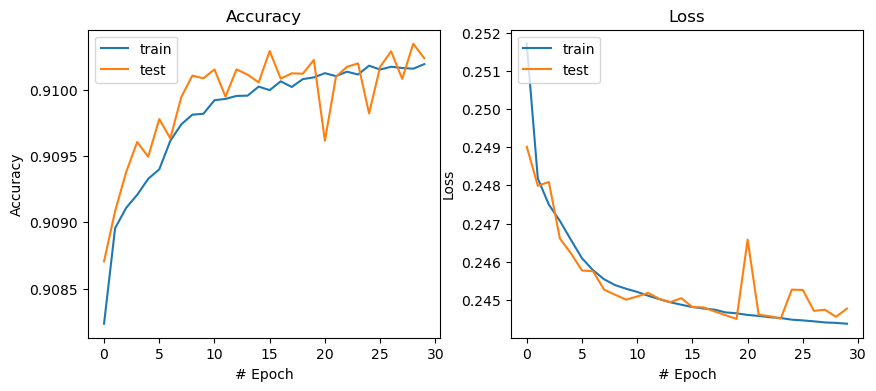

In [38]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))

# Accuracy
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('# Epoch')
ax[0].legend(['train', 'test'], loc='upper left')
ax[0].set_title('Accuracy')

# Loss
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('# Epoch')
ax[1].legend(['train', 'test'], loc='upper left')
ax[1].set_title('Loss')

In [42]:
X_test.shape

(1694933, 67)

In [188]:
X_test_unscaled = sc.inverse_transform(X_test)

In [189]:
X_test_unscaled

array([[1.97000000e+02, 9.80000000e+01, 4.94949495e-01, ...,
        5.83333333e-01, 1.00000000e+00, 5.29300000e+03],
       [1.97000000e+02, 9.80000000e+01, 4.94949495e-01, ...,
        9.68750000e-01, 1.00000000e+00, 5.89000000e+02],
       [9.90000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        6.15384615e-01, 5.17241379e-01, 5.89000000e+02],
       ...,
       [3.93000000e+02, 2.94000000e+02, 7.42424242e-01, ...,
        8.94736842e-01, 7.77777778e-01, 2.95000000e+02],
       [9.90000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        6.95652174e-01, 1.00000000e+00, 1.76500000e+03],
       [7.85000000e+02, 6.86000000e+02, 8.66161616e-01, ...,
        9.16666667e-01, 7.33333333e-01, 3.52900000e+03]])

In [190]:
ypred = y_pred_proba[:,-1]

In [191]:
ypred.shape

(1694933,)

In [192]:
#add output probablities to a column
X_test_1 = pd.DataFrame(X_test_unscaled)


In [193]:
X_test_full['reordered'] = ypred

In [194]:
X_test_full.head()

,user_id,product_id,total_product_orders_by_user,total_product_reorders_by_user,user_product_reorder_percentage,avg_add_to_cart_by_user,avg_days_since_last_bought,last_ordered_in,is_reorder_3,is_reorder_2,is_reorder_1,order_number,order_dow,order_hour_of_day,days_since_prior_order,mean_add_to_cart_order,total_orders,total_reorders,reorder_percentage,unique_users,order_first_time_total_cnt,order_second_time_total_cnt,is_organic,second_time_percent,aisle_mean_add_to_cart_order,aisle_std_add_to_cart_order,aisle_total_orders,aisle_total_reorders,aisle_reorder_percentage,aisle_unique_users,aisle_0,aisle_1,aisle_2,aisle_3,aisle_4,aisle_5,aisle_6,aisle_7,department_mean_add_to_cart_order,department_std_add_to_cart_order,department_total_orders,department_total_reorders,department_reorder_percentage,department_unique_users,department_0,department_1,department_2,department_3,department_4,avg_dow,std_dow,avg_doh,std_doh,avg_since_order,std_since_order,total_orders_by_user,total_products_by_user,total_unique_product_by_user,total_reorders_by_user,reorder_propotion_by_user,average_order_size,reorder_in_order,orders_3,orders_2,orders_1,reorder_3,reorder_2,reorder_1,order_diff,reordered
4910720,119021,24834,2.0,1.0,0.500,2.5,1.5,13.0,0.0,0.0,0.0,67.0,3.0,6.0,3.0,11.645592,2847,1264,0.443976,1583,1583,550,0,0.347442,10.762161,8.131685,382456,225748,0.590259,25819,0,0,1,1,0,0,1,0,10.575925,8.141542,423802,245369,0.578971,33730,0,1,0,0,0,2.269283,2.049328,9.791610,3.666280,5.290934,2.982889,66,739,296,443,0.599459,11.196970,0.605773,14.0,12.0,10.0,0.785714,0.583333,1.000000,54.0,0.005126
2617827,63849,34134,2.0,1.0,0.500,8.5,5.0,55.0,0.0,0.0,0.0,61.0,3.0,17.0,9.0,10.188675,8035,5180,0.644680,2855,2855,1409,0,0.493520,10.762161,8.131685,382456,225748,0.590259,25819,0,0,1,1,0,0,1,0,10.575925,8.141542,423802,245369,0.578971,33730,0,1,0,0,0,2.271384,2.103598,12.956454,4.219979,6.855365,3.900823,60,1286,271,1015,0.789269,21.433333,0.798403,22.0,32.0,21.0,0.772727,0.968750,1.000000,6.0,0.062229
6873479,167276,34243,1.0,0.0,0.000,12.0,30.0,7.0,0.0,0.0,0.0,13.0,0.0,3.0,12.0,8.884185,31792,20640,0.649220,11152,11152,5532,0,0.496055,8.852012,6.855405,3418021,2032172,0.594546,159213,0,0,1,0,0,1,0,0,8.022875,6.658899,9479291,6160710,0.649913,193237,0,1,1,1,0,4.343220,2.059952,15.432203,1.886024,22.716102,9.445021,12,236,123,113,0.478814,19.666667,0.529179,35.0,13.0,29.0,0.571429,0.615385,0.517241,6.0,0.070904
3958405,95822,47209,8.0,7.0,0.875,4.5,19.5,14.0,1.0,1.0,0.0,15.0,5.0,6.0,11.0,6.775011,213584,170131,0.796553,43453,43453,29031,0,0.668101,7.144228,6.280129,3642188,2615469,0.718104,177141,0,1,0,1,0,0,1,0,8.022875,6.658899,9479291,6160710,0.649913,193237,0,1,1,1,0,3.236994,1.900556,15.052023,3.685714,19.531792,10.611281,14,173,89,84,0.485549,12.357143,0.596100,28.0,15.0,16.0,0.428571,0.533333,0.687500,1.0,0.587918
3376844,81915,44501,1.0,0.0,0.000,15.0,7.0,20.0,0.0,0.0,0.0,29.0,0.0,14.0,7.0,9.604990,481,62,0.128898,419,419,47,0,0.112172,9.039906,7.777958,326692,99668,0.305082,86080,0,1,0,1,1,0,1,0,9.593425,7.875241,1875577,650301,0.346721,172755,0,0,0,1,0,2.247813,2.408523,15.104956,3.336937,6.696793,2.459298,28,343,62,281,0.819242,12.250000,0.824449,17.0,13.0,19.0,0.470588,0.923077,0.684211,9.0,0.015336


In [195]:
#create a dataframe with orderID and list of all possible productID's
test_products = X_test_full.groupby(['user_id'])['product_id'].apply(list).reset_index()

In [196]:
test_products

,user_id,product_id
0,1,"[14084, 17122, 10258, 10326]"
1,2,"[19051, 45613, 21227, 46676, 47553, 12000, 796..."
2,5,"[8518, 5999, 48775]"
3,7,"[29993, 29602, 46969, 31717, 43967, 29894, 42803]"
4,8,"[24838, 42736, 6473, 16349, 32197, 23400, 4799..."
...,...,...
127942,206199,"[20955, 17426, 29628, 38341, 17819, 41972, 376..."
127943,206200,"[22035, 14633, 21938, 28842, 25931, 48523, 352..."
127944,206203,"[11005, 22395, 3765, 3075, 26384, 13829, 9159,..."
127945,206205,"[20995, 22908, 44471, 19068]"


In [197]:
#collect all probs in a single list for each OrderID
probs = X_test_full.groupby(['user_id'])['reordered'].apply(list).reset_index()

In [198]:
probs

,user_id,reordered
0,1,"[0.044960249215364456, 0.06797946244478226, 0...."
1,2,"[0.11965768039226532, 0.05750956013798714, 0.0..."
2,5,"[0.25345876812934875, 0.24027720093727112, 0.0..."
3,7,"[0.28998005390167236, 0.042059969156980515, 0...."
4,8,"[0.1225457638502121, 0.12887294590473175, 0.05..."
...,...,...
127942,206199,"[0.3272389769554138, 0.2543204128742218, 0.041..."
127943,206200,"[0.05026867240667343, 0.025313647463917732, 0...."
127944,206203,"[0.1960572451353073, 0.0848042443394661, 0.081..."
127945,206205,"[0.16900379955768585, 0.22805257141590118, 0.1..."


In [199]:
test_products['probs'] = probs['reordered']

In [200]:
test_products

,user_id,product_id,probs
0,1,"[14084, 17122, 10258, 10326]","[0.044960249215364456, 0.06797946244478226, 0...."
1,2,"[19051, 45613, 21227, 46676, 47553, 12000, 796...","[0.11965768039226532, 0.05750956013798714, 0.0..."
2,5,"[8518, 5999, 48775]","[0.25345876812934875, 0.24027720093727112, 0.0..."
3,7,"[29993, 29602, 46969, 31717, 43967, 29894, 42803]","[0.28998005390167236, 0.042059969156980515, 0...."
4,8,"[24838, 42736, 6473, 16349, 32197, 23400, 4799...","[0.1225457638502121, 0.12887294590473175, 0.05..."
...,...,...,...
127942,206199,"[20955, 17426, 29628, 38341, 17819, 41972, 376...","[0.3272389769554138, 0.2543204128742218, 0.041..."
127943,206200,"[22035, 14633, 21938, 28842, 25931, 48523, 352...","[0.05026867240667343, 0.025313647463917732, 0...."
127944,206203,"[11005, 22395, 3765, 3075, 26384, 13829, 9159,...","[0.1960572451353073, 0.0848042443394661, 0.081..."
127945,206205,"[20995, 22908, 44471, 19068]","[0.16900379955768585, 0.22805257141590118, 0.1..."


In [ ]:
#Exisiting User

In [203]:
from tqdm import tqdm
from f1optimization_faron import get_best_prediction

In [204]:
#run faron's optimization code to get most probable set of products which might be reordered
products = []
for i in tqdm(test_products.index):
    prods = get_best_prediction(test_products.iloc[i]['product_id'], test_products.iloc[i]['probs'], None)
    products.append(prods)

test_products['products']= products
    
test_products['user_id'] = test_products['user_id'].apply(int)
test_products.drop(['product_id','probs'], axis = 1, inplace = True)

100%|█████████████████████████████████| 127947/127947 [00:58<00:00, 2172.10it/s]


In [224]:
test_products

,user_id,products
0,1,10258
1,2,None
2,5,None
3,7,None 29993
4,8,None 21903 4799
...,...,...
127942,206199,38341 20955 18523 4367 31683 17426 47672
127943,206200,21903 13176 37646 18615 47626 21938
127944,206203,None
127945,206205,None


In [268]:
# User ID to find
user_id_to_find = 14

# Filter the DataFrame for the specific user_id
user_data = test_products[test_products['user_id'] == user_id_to_find]

# Print the user's data
print("Data for user ID", user_id_to_find, ":")
print(user_data)

# Access and print the products list for this user
if not user_data.empty:
    products_list = user_data.iloc[0]['products']
    print("Products for user ID", user_id_to_find, ":", products_list)
else:
    print("No data found for user ID", user_id_to_find)

Data for user ID 14 :
   user_id    products
8       14  23803 8744
Products for user ID 14 : 23803 8744


In [269]:
user_data

,user_id,products
8,14,23803 8744


In [218]:
product_data = pd.read_csv('/Users/abhinavsharma/Documents/Jyoti MSBA/Data/Full/products.CSV')

In [270]:
import pandas as pd

# Load product names from a CSV file
#product_data = pd.read_csv('product_data.csv')
product_data['product_id'] = product_data['product_id'].astype(int)
id_to_name = product_data.set_index('product_id')['product_name'].to_dict()

# Define a function to map product IDs to names
def get_product_names(product_ids):
    ids = map(int, product_ids.split())
    return [id_to_name.get(id, "Unknown Product") for id in ids]

# Assuming you have some user data where products are listed as a space-separated string
# user_data = pd.DataFrame({
#     'user_id': [10],
#     'products': ['16797 9871 13829 42625']
# })

# Apply the function to convert IDs to names
user_data['product_names'] = user_data['products'].apply(get_product_names)

# Print the results
print("Data for user ID 10:")
print(user_data[['user_id', 'product_names']])


Data for user ID 10:
   user_id                        product_names
8       14  [Jalapeno Pepper, Mixed Vegetables]


In [271]:
user_data

,user_id,products,product_names
8,14,23803 8744,"[Jalapeno Pepper, Mixed Vegetables]"


In [ ]:
#New customers

In [230]:
from datetime import datetime

In [231]:
#get current time
start_time = datetime.now()

In [232]:
# datetime object containing current date and time
now = datetime.now()

In [233]:
# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
today = int(dt_string.split("/")[0])

In [254]:
#get data from user end
#user_id = int('user_id') #user_id
order_hour_of_day = int(dt_string.split(" ")[1].split(":")[0]) #current date
order_dow = datetime.today().weekday() #current day of week

In [239]:
top= pd.read_pickle('top10_products.pkl')
top_products_1 = top[(top['order_dow']==order_dow) & (top['order_hour_of_day']==order_hour_of_day)]['product_name'].values.tolist()

In [241]:
top_products_1 = {i: value for i,value in enumerate(top_products_1)}

In [242]:
predictions={}

In [244]:
predictions['top'] =  top_products_1

In [250]:
def final(X = None):
    
    """
    Function returns the predicted product recommendations if its existing user, else returns 
    most frequently purchased product at that hour and on that day.
    
    user_id           : provided
    order_hour_of_day : calculated by seeing current time
    order_dow         : calulated by seeing current day of week
    
    """

    #get current time
    start_time = datetime.now()

    # datetime object containing current date and time
    now = datetime.now()

    # dd/mm/YY H:M:S
    dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
    today = int(dt_string.split("/")[0])

    #get data from user end
    user_id = int(X['user_id']) #user_id
    order_hour_of_day = int(dt_string.split(" ")[1].split(":")[0]) #current date
    order_dow = datetime.today().weekday() #current day of week

    """
    check if the user is new or existing,
    this file contains user's last order date
    
    Handling: since in our model days since prior order is a feature, which cannot be calculated without user's last order date.
              assuming that this model is deployed on 21-march-2021, all users last order are taken as 21-march-2021.
              But this assumption likely introduces new bugs.
              Ex- user A , never made a purchase with days_prior_order = 3, if he makes he does this in future , the below handles,
              such exceptions
    """
    
    ulp = pd.read_pickle("user_last_purchase.pkl")
    
    #if user is new -> cold start -> recommend products which are most frequently purchased based on time and day of week
    if user_id not in ulp['user_id'].values:

        #get top 10 products based on hour of day and day of week
        top= pd.read_pickle('top10_products.pkl')
        top_products = top[(top['order_dow']==order_dow) & (top['order_hour_of_day']==order_hour_of_day)]['product_name'].values.tolist()
        top_products = {i: value for i,value in enumerate(top_products)}
        #paths = get_image_paths(top5_products)
        predictions={}
        predictions['top'] =  top_products

        del ulp, top,now, today, dt_string, order_dow, order_hour_of_day

        end_time = datetime.now()
        difference = end_time - start_time
        #print("Total Time : {} seconds".format(difference))
        time = "{}".format(difference)
        
        return predictions,time

In [252]:
X = {}
X['user_id'] = 225004
recommended_products = final(X)
print("Recommended products")
print("="*20)
for _,value in recommended_products[0]['top'].items():
    print(value)
print("Time taken :", recommended_products[1])

Recommended products
Banana
Bag of Organic Bananas
Organic Strawberries
Organic Baby Spinach
Organic Hass Avocado
Organic Avocado
Strawberries
Large Lemon
Organic Raspberries
Organic Whole Milk
Time taken : 0:00:00.017661


In [62]:
#Top products
Top_products = X_test_full.groupby(['product_id'])['reordered'].mean().reset_index().sort_values('reordered', ascending=False)

In [63]:
Top_products

,product_id,reordered
22573,26093,0.923072
31539,36444,0.890437
34904,40362,0.890293
18215,21079,0.888427
37675,43579,0.878544
...,...,...
32834,37961,0.000759
14963,17308,0.000719
3236,3769,0.000678
35868,41465,0.000677


In [65]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [71]:
# Merging the data on 'product_id'
merged_data = Top_products.merge(products, on='product_id', how='left')
merged_data.drop(['aisle_id', 'department_id'], axis = 1, inplace = True)
merged_data

,product_id,reordered,product_name
0,26093,0.923072,Soy Crisps Lightly Salted
1,36444,0.890437,Go Lean Chocolate Crunch Cereal
2,40362,0.890293,Ultra Plush White Mega Rolls
3,21079,0.888427,French Vanilla Flavored Medium Roast Ground Co...
4,43579,0.878544,"Body Wash, Restoring, Marula Oil Infused"
...,...,...,...
42968,37961,0.000759,Grain Free Beef & Egg
42969,17308,0.000719,Crab Meat Backfin Lump
42970,3769,0.000678,Organic Mini Peanut Butter Crackers
42971,41465,0.000677,"Quinoa, Southwest Black Bean"
